In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
#import numpy as np
#import requests
#import time
from scipy.stats import linregress

#import us

# Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

# pprint - useful for browsing api results
#from pprint import pprint

In [2]:
data = pd.read_csv("../../Resources/AllByState-Daily.csv")
data.head()

,Active,Confirmed,Date,Deaths,Fatality Rate,Recovered,State Name,State,Active Diff,Confirmed Diff,Deaths Diff,Recovered Diff,Lat,Lon,Land Area (mi2),Population,Population Density,Per Capita Income,Median Household Income
0,0,0,2020-03-10,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
1,0,0,2020-03-11,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
2,0,0,2020-03-12,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
3,1,1,2020-03-13,0,0.0,0,Alaska,AK,1,1,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
4,1,1,2020-03-15,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0


In [13]:
max_date = pd.to_datetime(data['Date']).max().date()
recent_df = data[data['Date'] == str(max_date)]
recent_df.count()

Active                     50
Confirmed                  50
Date                       50
Deaths                     50
Fatality Rate              50
Recovered                  50
State Name                 50
State                      50
Active Diff                50
Confirmed Diff             50
Deaths Diff                50
Recovered Diff             50
Lat                        50
Lon                        50
Land Area (mi2)            50
Population                 50
Population Density         50
Per Capita Income          50
Median Household Income    50
dtype: int64

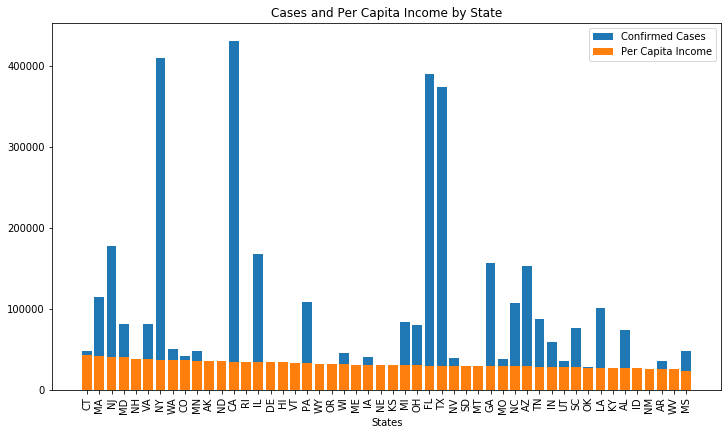

In [26]:
recent_df = recent_df.sort_values(['Per Capita Income'], ascending=False)

fig, ax = plt.subplots()

plt.bar('State', 'Confirmed', data=recent_df)
plt.bar('State', 'Per Capita Income', data=recent_df)
plt.legend(labels=['Confirmed Cases', 'Per Capita Income'], loc='best')
plt.xlabel('States')
plt.title('Cases and Per Capita Income by State')
plt.xticks(rotation=90)

fig.set_size_inches(12,6.75) #16:9 aspect 

plt.savefig('Figures/Cases-PCI-v-State.png')
plt.show()

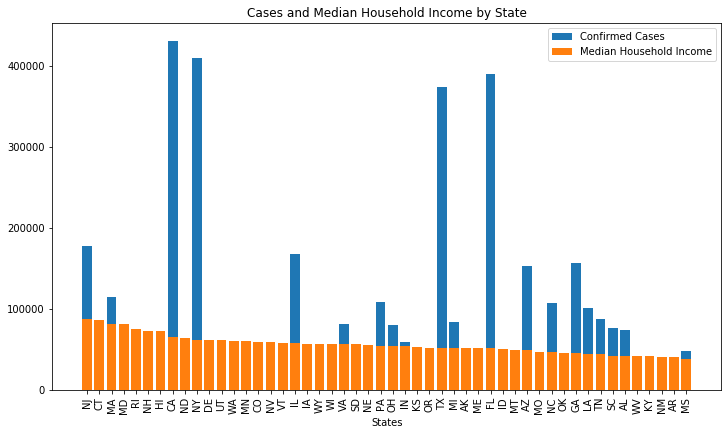

In [27]:
recent_df = recent_df.sort_values(['Median Household Income'], ascending=False)

fig, ax = plt.subplots()

plt.bar('State', 'Confirmed', data=recent_df)
plt.bar('State', 'Median Household Income', data=recent_df)
plt.legend(labels=['Confirmed Cases', 'Median Household Income'], loc='best')
plt.xlabel('States')
plt.title('Cases and Median Household Income by State')
plt.xticks(rotation=90)

fig.set_size_inches(12,6.75) #16:9 aspect 

plt.savefig('Figures/Cases-MHI-v-State.png')
plt.show()

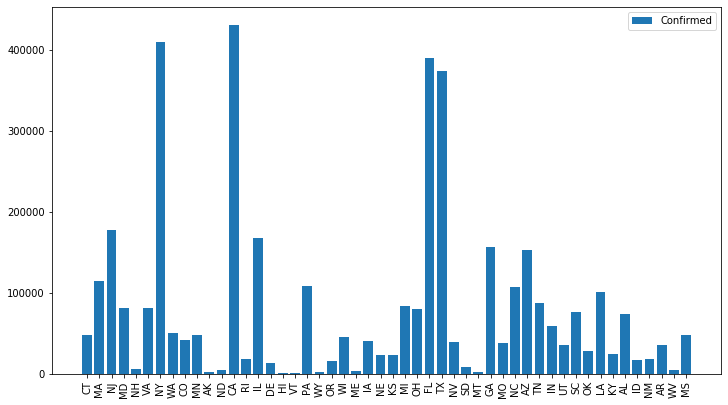

In [16]:
fig, ax = plt.subplots()

plt.bar('State', 'Confirmed', data=recent_df)
#plt.bar('State', 'Median Household Income', data=recent_df)
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases By State')

fig.set_size_inches(12,6.75)

plt.show()

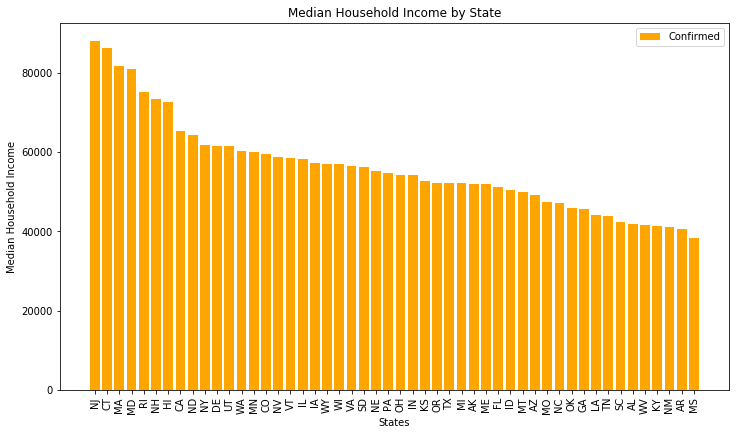

In [28]:
fig, ax = plt.subplots()

#plt.bar('State', 'Confirmed', data=recent_df)
plt.bar('State', 'Median Household Income', data=recent_df, color='orange')
plt.legend(labels=['Confirmed', 'Median Household Income'], loc='best')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Median Household Income')
plt.title('Median Household Income by State')

fig.set_size_inches(12,6.75)

plt.show()

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots
def mylinregress(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    
    return regress_values, line_eq, rvalue

The r-squared is: 0.006639795393739652


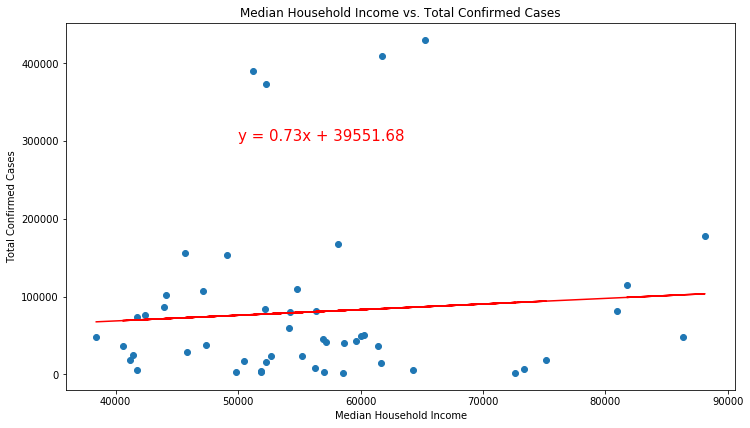

In [22]:
#Define x and y axes
x_values = recent_df['Median Household Income']
y_values = recent_df['Confirmed']

#Define liner regression from above custom function
(regress_values, line_eq, rvalue) = mylinregress(x_values, y_values)

#Plot the results
fig, ax = plt.subplots()

fig.set_size_inches(12, 6.75)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50000,300000),fontsize=15,color="red")
plt.xlabel('Median Household Income')
plt.ylabel('Total Confirmed Cases')
plt.title('Median Household Income vs. Total Confirmed Cases')
plt.savefig("Figures/MHI-v-Confirmed.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.021011243026887238


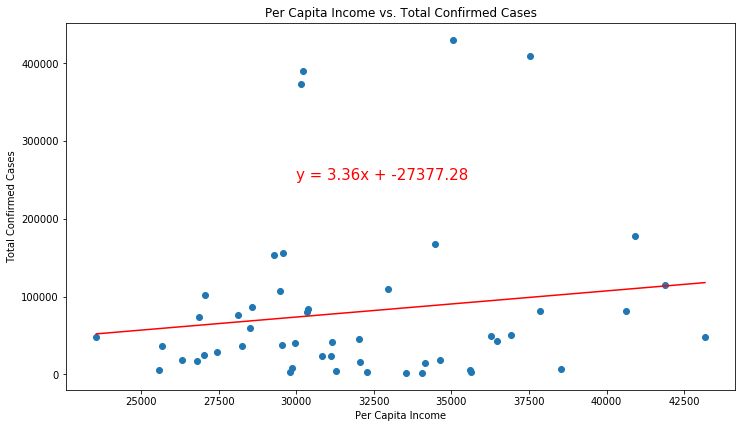

In [23]:
#Define x and y axes
x_values = recent_df['Per Capita Income']
y_values = recent_df['Confirmed']

#Define liner regression from above custom function
(regress_values, line_eq, rvalue) = mylinregress(x_values, y_values)

#Plot the results
fig, ax = plt.subplots()

fig.set_size_inches(12, 6.75)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30000,250000),fontsize=15,color="red")
plt.xlabel('Per Capita Income')
plt.ylabel('Total Confirmed Cases')
plt.title('Per Capita Income vs. Total Confirmed Cases')
plt.savefig("Figures/PCI-v-Confirmed.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [55]:
richest_df = recent_df.sort_values(['Median Household Income'], ascending=False)
richest_df.head()

,Active,Confirmed,Date,Deaths,Fatality Rate,Recovered,State Name,State,Active Diff,Confirmed Diff,Deaths Diff,Recovered Diff,Lat,Lon,Land Area (mi2),Population,Population Density,Per Capita Income,Median Household Income
3941,162157,177887,2020-07-23,15730,0.0884,0,New Jersey,NJ,219,242,23,0,40.2989,-74.5210,7048.31,8876621.0,1259.397075,40906.775435,88126.5
814,43822,48232,2020-07-23,4410,0.0914,0,Connecticut,CT,5,9,4,0,41.5978,-72.7554,4829.57,3569498.0,739.092300,43172.210523,86324.0
2717,106163,114647,2020-07-23,8484,0.0740,0,Massachusetts,MA,311,327,16,0,42.2302,-71.5301,7740.87,6813145.0,880.152360,41878.868832,81742.5
2581,77427,80836,2020-07-23,3409,0.0422,0,Maryland,MD,660,664,4,0,39.0639,-76.8021,9529.87,5978351.0,627.327655,40641.712984,80976.5
5165,17147,18148,2020-07-23,1001,0.0552,0,Rhode Island,RI,82,86,4,0,41.6809,-71.5118,1024.57,1053151.0,1027.895605,34638.080080,75143.0


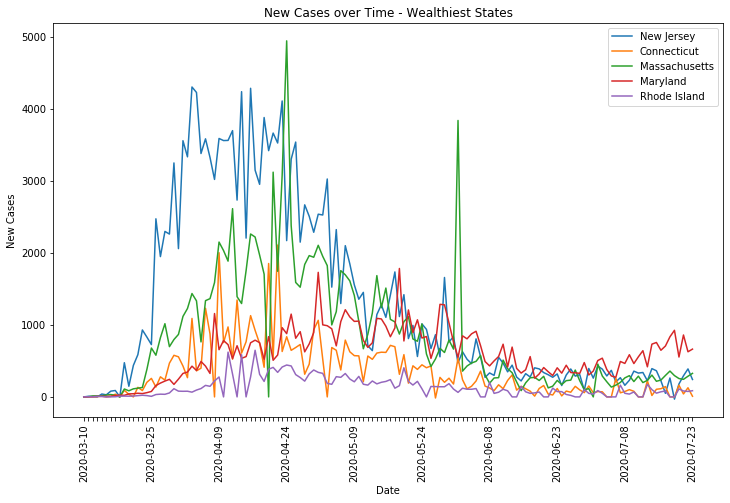

In [24]:
nj_df = data[data["State"] == 'NJ']
ct_df = data[data["State"] == 'CT']
ma_df = data[data["State"] == 'MA']
md_df = data[data["State"] == 'MD']
ri_df = data[data["State"] == 'RI']

fig, ax = plt.subplots()

plt.plot('Date', 'Confirmed Diff', data=nj_df)
plt.plot('Date', 'Confirmed Diff', data=ct_df)
plt.plot('Date', 'Confirmed Diff', data=ma_df)
plt.plot('Date', 'Confirmed Diff', data=md_df)
plt.plot('Date', 'Confirmed Diff', data=ri_df)
plt.legend(labels=['New Jersey', 'Connecticut', 'Massachusetts', 'Maryland', 'Rhode Island'], loc='best')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('New Cases over Time - Wealthiest States')
plt.xticks(rotation=90)

fig.set_size_inches(12, 7.25)

#Show only every 15th label to avoid overcrowding
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % 15 != 0:
        label.set_visible(False)
        
plt.savefig('Figures/NewCases-v-Time-Wealthiest.png')        
plt.show()

In [53]:
poorest_df = recent_df.sort_values(['Median Household Income'], ascending=True)
poorest_df.head()

,Active,Confirmed,Date,Deaths,Fatality Rate,Recovered,State Name,State,Active Diff,Confirmed Diff,Deaths Diff,Recovered Diff,Lat,Lon,Land Area (mi2),Population,Population Density,Per Capita Income,Median Household Income
3125,46617,48053,2020-07-23,1436,0.0299,0,Mississippi,MS,969,982,13,0,32.7416,-89.6787,45729.42,2962109.0,64.774690,23556.907406,38418.0
406,35873,36259,2020-07-23,386,0.0106,0,Arkansas,AR,1007,1013,6,0,34.9697,-92.3731,49590.60,2977621.0,60.044061,25666.556534,40574.0
4077,17567,18163,2020-07-23,596,0.0328,0,New Mexico,NM,330,335,5,0,34.8405,-106.2485,85632.24,2027014.0,23.671155,26314.412198,41144.0
2173,24463,25147,2020-07-23,684,0.0272,0,Kentucky,KY,600,607,7,0,37.6681,-84.6701,38258.94,4415535.0,115.411849,27028.399130,41392.0
6389,5350,5452,2020-07-23,102,0.0187,0,West Virginia,WV,239,240,1,0,38.4912,-80.9545,22404.97,1796714.0,80.192654,25582.076070,41738.0


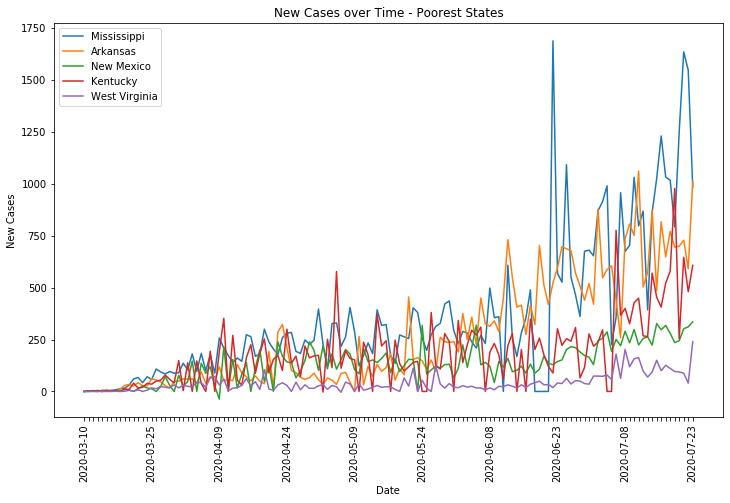

In [29]:
ms_df = data[data['State'] == 'MS']
ar_df = data[data['State'] == 'AR']
nm_df = data[data['State'] == 'NM']
ky_df = data[data['State'] == 'KY']
wv_df = data[data['State'] == 'WV']

fig, ax = plt.subplots()

plt.plot('Date', 'Confirmed Diff', data=ms_df)
plt.plot('Date', 'Confirmed Diff', data=ar_df)
plt.plot('Date', 'Confirmed Diff', data=nm_df)
plt.plot('Date', 'Confirmed Diff', data=ky_df)
plt.plot('Date', 'Confirmed Diff', data=wv_df)
plt.legend(labels=['Mississippi', 'Arkansas', 'New Mexico', 'Kentucky', 'West Virginia'], loc='best')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('New Cases over Time - Poorest States')
plt.xticks(rotation=90)
fig.set_size_inches(12, 7.25)

#Show only every 15th label to avoid overcrowding
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % 15 != 0:
        label.set_visible(False)

plt.savefig('Figures/NewCases-v-Time-Poorest.png')        
plt.show()